# **PRESENTATION**

Cartograpy est un package python qui permet de manipuler des données geographiques et de creer des cartes simplement.

# **FONCTIONNALITE**
- Telecharger des données de découpage administratif de pays
- Importer des données de types vectorielles et matricielles
- Faire des traitement sur les données geospatiales importé
- Creer des cartes et les personnaliser simplement

# **INSTALLATION**

Pour installer le package cartograpy, vous pouvez utiliser pip. Ouvrez votre terminal ou invite de commande et exécutez la commande suivante :

```bash
pip install cartograpy
```

# **UTILISATION**


## **Obtension de données géographiques**

### *Récupérer les limites administratives d'un ou plusieurs pays*

In [37]:
# Importation
from cartograpy import data
client = data.GeoBoundaries()

**Les niveau de subbdivision administrative disponibles sont :**

Il existe 5 subdivisions administratives disponibles :

In [38]:
print(client.adminLevels())


| Niveau GeoBoundaries | Nom commun (FR)           | Nom commun (EN)       |
| -------------------- | ------------------------- | --------------------- |
| ADM0                 | Pays                      | Country               |
| ADM1                 | Région / État / Province  | State / Region        |
| ADM2                 | Département / District    | District / County     |
| ADM3                 | Sous-préfecture / Commune | Subdistrict / Commune |
| ADM4                 | Village / Localité        | Village / Locality    |
| ADM5                 | Quartier / Secteur        | Neighborhood / Sector |
        


**Remarques importantes :**

- Le nombre de niveaux dépend du pays. Certains pays s’arrêtent à ADM2, d’autres vont jusqu’à ADM4 ou ADM5.
- Le nom réel des subdivisions varie d’un pays à l’autre (ex : “State”, “Region”, “Province”, “Department”, etc.).
- GeoBoundaries propose toujours au moins le niveau ADM0 (frontière nationale).

Pour savoir si un niveau administratif est disponible pour un pays, vous pouvez utiliser la méthode `is_valid_adm` de l'objet `GeoBoundaries`. 
Voici un exemple :

In [39]:
print(client.is_valid_adm("CIV","ADM1"))  # Exemple pour vérifier si le niveau ADM1 est valide pour la Côte d'Ivoire
# Ou encore
print(client._get_smallest_adm("CIV"))  # Exemple pour vérifier si le niveau admin minimum pour la Côte d'Ivoire

True
Smallest ADM level found for CIV : ADM3
ADM3


**Les codes des pays sont conformes à la norme ISO 3166-1 alpha-3 :**

Pour obtenir la liste des pays valides, vous pouvez utiliser la méthode `countries()` de l'objet `GeoBoundaries`. 
Voici un exemple :

In [40]:
client.countries()[0:10]  # Affiche les 10 premiers pays

['أفغانستان',
 'афганистан',
 'afghánistán',
 'afghanistan',
 'αφγανιστάν',
 'afganio',
 'afganistán',
 'afganistan',
 'afganisztán',
 'աֆղանստան']

In [41]:
client.get_iso3("burk")

'BFA'

In [42]:
client.get_iso3("con")  # Exemple pour obtenir le code ISO d'un pays

[('congo', 'cog'),
 ('república del congo', 'cog'),
 ('république du congo', 'cog'),
 ('rep. del congo', 'cog'),
 ('congo-brazzaville', 'cog'),
 ('república do congo', 'cog'),
 ('demokratiske republik congo', 'cod'),
 ('congo, democratic republic of the', 'cod'),
 ('república democrática del congo', 'cod'),
 ('république démocratique du congo', 'cod'),
 ('rd del congo', 'cod'),
 ('congo-kinshasa', 'cod'),
 ('república democrática do congo', 'cod'),
 ('republica democrată congo', 'cod')]

In [43]:

# Exemple 1: Récupérer les données administratives des régions de la cote d'ivoire
civ_data = client.adm("CIV", "ADM2")
civ_data.head()

geometry      shapeName shapeISO  \
0  POLYGON ((-4.68451 6.27179, -4.6868 6.26883, -...  Agneby-Tiassa            
1  POLYGON ((-7.71925 9.07004, -7.72574 9.06397, ...         Bafing            
2  POLYGON ((-6.19702 10.24246, -6.20038 10.24495...         Bagoue            
3  MULTIPOLYGON (((-4.68451 6.27179, -4.68338 6.2...         Belier            
4  POLYGON ((-6.70042 9.06196, -6.70118 9.05639, ...           Bere            

                   shapeID shapeGroup shapeType  
0  98640826B52449815511854        CIV      ADM2  
1  98640826B37750272367318        CIV      ADM2  
2  98640826B26044148659027        CIV      ADM2  
3   98640826B5123145245776        CIV      ADM2  
4  98640826B43857880322183        CIV      ADM2

In [44]:
# Exemple 2 : Récupérer les limites administratives de plusieurs pays (senegal et mali ici)
countries_data = client.adm(["SEN", "mali"], "ADM2")
countries_data["mali"].head()

geometry shapeName shapeISO  \
0  POLYGON ((-7.92938 12.68171, -7.93554 12.68821...    Bamako            
1  POLYGON ((1.32448 16.90639, 1.03227 16.61402, ...   Ansongo            
2  POLYGON ((1.17767 17.69958, 1.15458 17.70648, ...    Bourem            
3  POLYGON ((1.32448 16.90639, 1.65353 17.5735, 1...       Gao            
4  POLYGON ((1.31144 15.27381, 1.4716 15.28167, 1...    Menaka            

                  shapeID shapeGroup shapeType  
0  8926073B70420899930674        MLI      ADM2  
1  8926073B56917716124995        MLI      ADM2  
2  8926073B86504284097699        MLI      ADM2  
3  8926073B84061132695750        MLI      ADM2  
4   8926073B3742503303790        MLI      ADM2

### Récupérer les métadonnées d'un territoire

In [45]:

# Récupérer les métadonnées d'un territoire
metadata_civ = client.metadata("CIV", "ADM0")


print(f"Métadonnées disponibles pour la Côte d'Ivoire: {metadata_civ.keys()}")


Métadonnées disponibles pour la Côte d'Ivoire: dict_keys(['boundaryID', 'boundaryName', 'boundaryISO', 'boundaryYearRepresented', 'boundaryType', 'boundaryCanonical', 'boundarySource', 'boundaryLicense', 'licenseDetail', 'licenseSource', 'boundarySourceURL', 'sourceDataUpdateDate', 'buildDate', 'Continent', 'UNSDG-region', 'UNSDG-subregion', 'worldBankIncomeGroup', 'admUnitCount', 'meanVertices', 'minVertices', 'maxVertices', 'meanPerimeterLengthKM', 'minPerimeterLengthKM', 'maxPerimeterLengthKM', 'meanAreaSqKM', 'minAreaSqKM', 'maxAreaSqKM', 'staticDownloadLink', 'gjDownloadURL', 'tjDownloadURL', 'imagePreview', 'simplifiedGeometryGeoJSON'])


In [46]:
metadata_civ["Continent"]

'Africa'

In [47]:
metadata_civ["UNSDG-subregion"]

'Western Africa'

In [48]:
metadata_civ["UNSDG-region"]

'Sub-Saharan Africa'

In [49]:
url_img=metadata_civ["imagePreview"]
url_img

'https://github.com/wmgeolab/geoBoundaries/raw/9469f09/releaseData/gbOpen/CIV/ADM0/geoBoundaries-CIV-ADM0-PREVIEW.png'

In [50]:
# Afficher l'image de prévisualisation dans le notebook
from IPython.display import Image, display

try :
    display(Image(url=url_img))
except :
    print("Impossible d'afficher l'image.")

### *Géocoder une ou plusieurs adresses*

Le geocodage permet de convertir des adresses en coordonnées géographiques (latitude et longitude).
Vous pouvez géocoder une ou plusieurs adresses en utilisant les méthode `geocode` et `geocode_batch` de l'objet `Geocoder`.

In [51]:
from cartograpy import data
geocoder= data.Geocoder()

**Géocoder une adresse**


In [52]:
address = "bouaké"
result = geocoder.geocode(address)

# Adresse trouvée
result[0]

Début du géocodage de 1 localité(s)...
Géocodage terminé.


query                                          address  latitude  \
0  bouaké  Bouaké, Gbêkê, Vallée du Bandama, Côte d’Ivoire  7.689021   

   longitude  altitude                                                raw  \
0  -5.028355       0.0  {'place_id': 277285966, 'licence': 'Data © Ope...   

                   geometry  
0  POINT (-5.02836 7.68902)

In [53]:
# Adresse non trouvée
result[1]

[]

**Geocoder une liste d'adresses**

In [54]:
liste_adresses = ["Abidjan", "Yamoussoukro", "Bouaké", "Korhogo","Man CI", "","portbouet"]
results=geocoder.geocode(liste_adresses)

# Adresses trouvées
results[0]

Début du géocodage de 7 localité(s)...
Géocodage terminé.


query                                          address  latitude  \
0       Abidjan      Abidjan, Le Plateau, Abidjan, Côte d’Ivoire  5.320357   
1  Yamoussoukro                      Yamoussoukro, Côte d’Ivoire  6.820007   
2        Bouaké  Bouaké, Gbêkê, Vallée du Bandama, Côte d’Ivoire  7.689021   
3       Korhogo            Korhogo, Poro, Savanes, Côte d’Ivoire  9.458070   
4        Man CI            Man, Tonkpi, Montagnes, Côte d’Ivoire  7.410258   

   longitude  altitude                                                raw  \
0  -4.016107       0.0  {'place_id': 277113208, 'licence': 'Data © Ope...   
1  -5.277603       0.0  {'place_id': 405157296, 'licence': 'Data © Ope...   
2  -5.028355       0.0  {'place_id': 277285966, 'licence': 'Data © Ope...   
3  -5.631629       0.0  {'place_id': 277168989, 'licence': 'Data © Ope...   
4  -7.550372       0.0  {'place_id': 276691276, 'licence': 'Data © Ope...   

                   geometry  
0  POINT (-4.01611 5.32036)  
1   POINT (-5.2776 6.82001)  
2  POINT (-5.02836 7.68902)  
3  POINT (-5.63163 9.45807)  
4  POINT (-7.55037 7.41026)

In [55]:
# Adresses non trouvée
results[1]

['', 'portbouet']

## **Visualisation de données**

cartograpy permet de creer rapidement des cartes pour visualier les données géographiques.

In [56]:
from cartograpy.maper import *

In [57]:
# J'ajoute des données aléatoires pour la visualisation
import random
civ_data['data'] = [random.randint(0,10000) for i in range(len(civ_data))]

In [58]:
civ_data.head()

geometry      shapeName shapeISO  \
0  POLYGON ((-4.68451 6.27179, -4.6868 6.26883, -...  Agneby-Tiassa            
1  POLYGON ((-7.71925 9.07004, -7.72574 9.06397, ...         Bafing            
2  POLYGON ((-6.19702 10.24246, -6.20038 10.24495...         Bagoue            
3  MULTIPOLYGON (((-4.68451 6.27179, -4.68338 6.2...         Belier            
4  POLYGON ((-6.70042 9.06196, -6.70118 9.05639, ...           Bere            

                   shapeID shapeGroup shapeType  data  
0  98640826B52449815511854        CIV      ADM2  3060  
1  98640826B37750272367318        CIV      ADM2  2662  
2  98640826B26044148659027        CIV      ADM2  2805  
3   98640826B5123145245776        CIV      ADM2  9731  
4  98640826B43857880322183        CIV      ADM2  2187

In [59]:
geocode_localite=results[0]
geocode_localite["data"]= [random.randint(0,10000) for i in range(len(geocode_localite))]
geocode_localite.head()

query                                          address  latitude  \
0       Abidjan      Abidjan, Le Plateau, Abidjan, Côte d’Ivoire  5.320357   
1  Yamoussoukro                      Yamoussoukro, Côte d’Ivoire  6.820007   
2        Bouaké  Bouaké, Gbêkê, Vallée du Bandama, Côte d’Ivoire  7.689021   
3       Korhogo            Korhogo, Poro, Savanes, Côte d’Ivoire  9.458070   
4        Man CI            Man, Tonkpi, Montagnes, Côte d’Ivoire  7.410258   

   longitude  altitude                                                raw  \
0  -4.016107       0.0  {'place_id': 277113208, 'licence': 'Data © Ope...   
1  -5.277603       0.0  {'place_id': 405157296, 'licence': 'Data © Ope...   
2  -5.028355       0.0  {'place_id': 277285966, 'licence': 'Data © Ope...   
3  -5.631629       0.0  {'place_id': 277168989, 'licence': 'Data © Ope...   
4  -7.550372       0.0  {'place_id': 276691276, 'licence': 'Data © Ope...   

                   geometry  data  
0  POINT (-4.01611 5.32036)  3721  
1   POINT (-5.2776 6.82001)   166  
2  POINT (-5.02836 7.68902)   696  
3  POINT (-5.63163 9.45807)  9657  
4  POINT (-7.55037 7.41026)  5024

**Creer une carte cloropleth simple**

c:\Users\kanic\.virtualenvs\carto\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
C

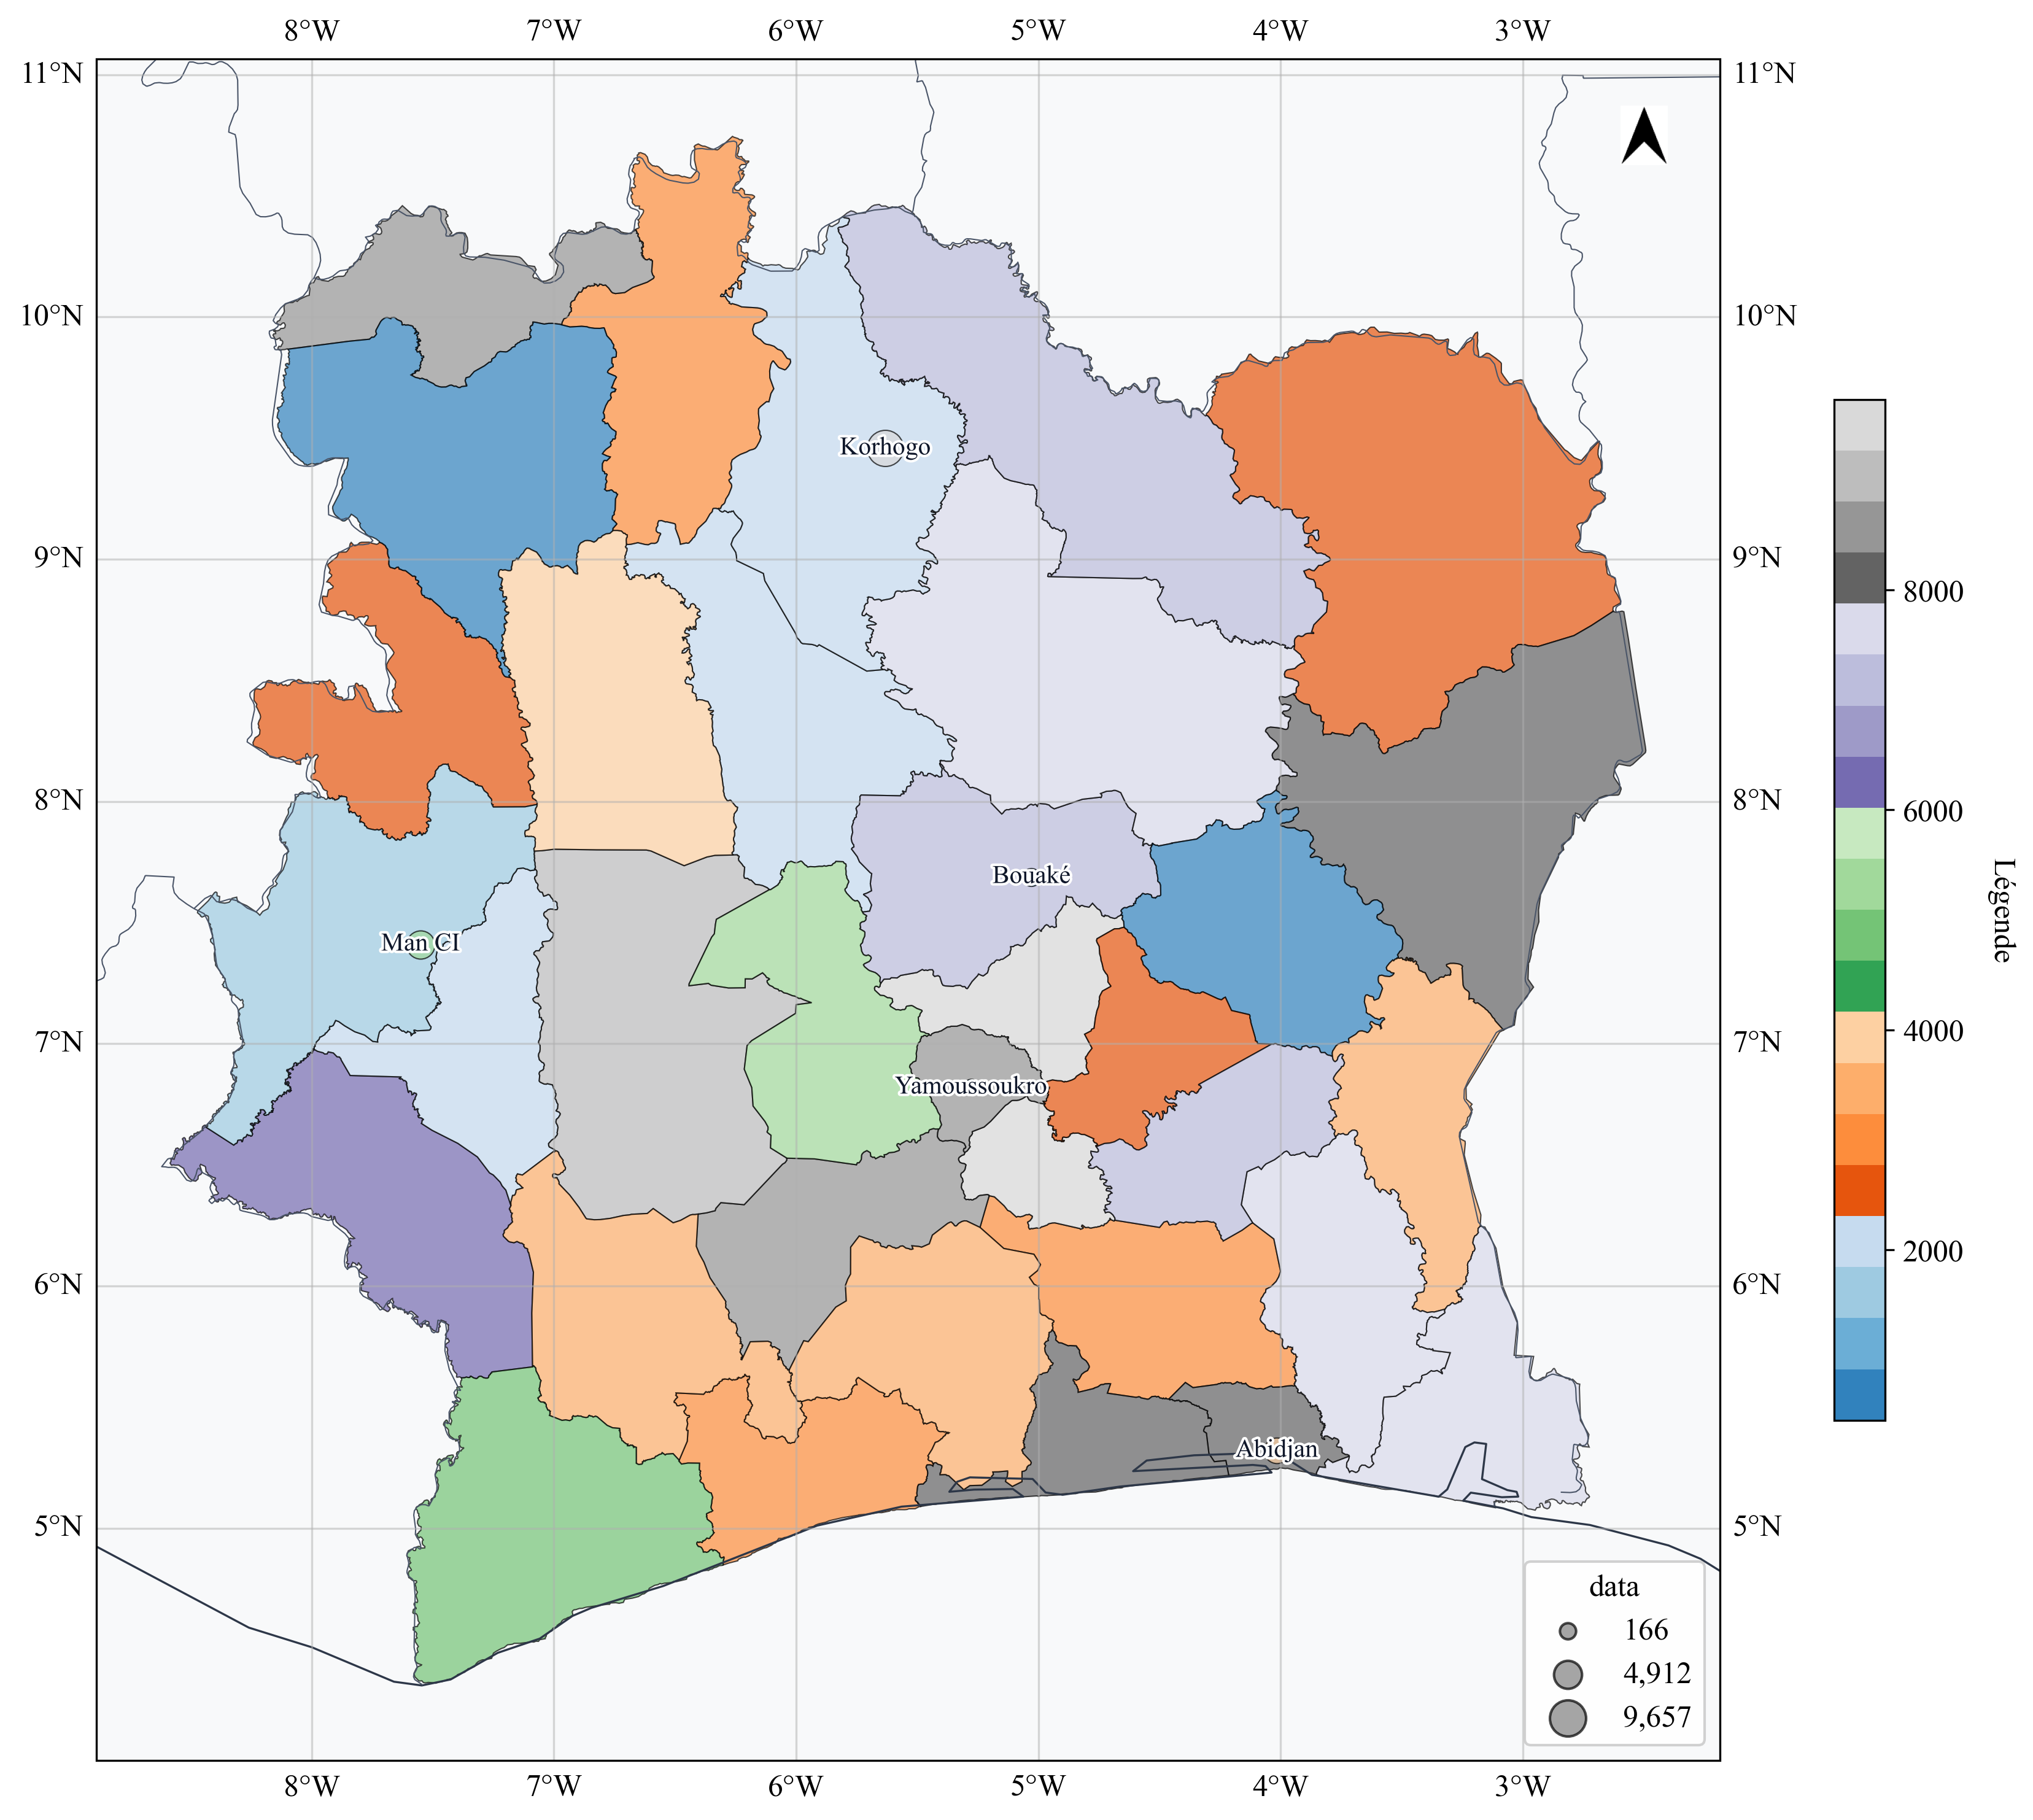

In [60]:
carte_ci=Map(figsize=(16, 12), projection=ccrs.PlateCarree())
carte_ci.add_vector_choropleth(geodf=civ_data,
                              column_to_plot='data',
                                title='Légende',
                                cmap='tab20c',
                                )
carte_ci.add_vector_points(
    geodf=geocode_localite,
    column_to_plot="data",
    label_column="query",
    point_size_column="data",
    show_colorbar=False,
    cmap="tab20c"
    
)

font_name=get_fonts("time")[0]
font_name
carte_ci.set_font(font_name, size=12)
carte_ci.add_arrow('cartograpy/svg/arrows/NorthArrow_11.svg', position=(-2.5,10.75),zoom=0.3, color="black")
carte_ci.figsize=(18,16)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kanic\AppData\Local\Temp\ipykernel_39904\3647050440.py:5: SyntaxWarning: invalid escape sequence '\d'
  carte.add_raster('test\data\Limite DEM Bouna.tif', cmap='tab20c', title='Élévation (m)')
c:\Users\kanic\.virtualenvs\carto\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle color: param(outline)
Can't handle c

'carte_demo.png'

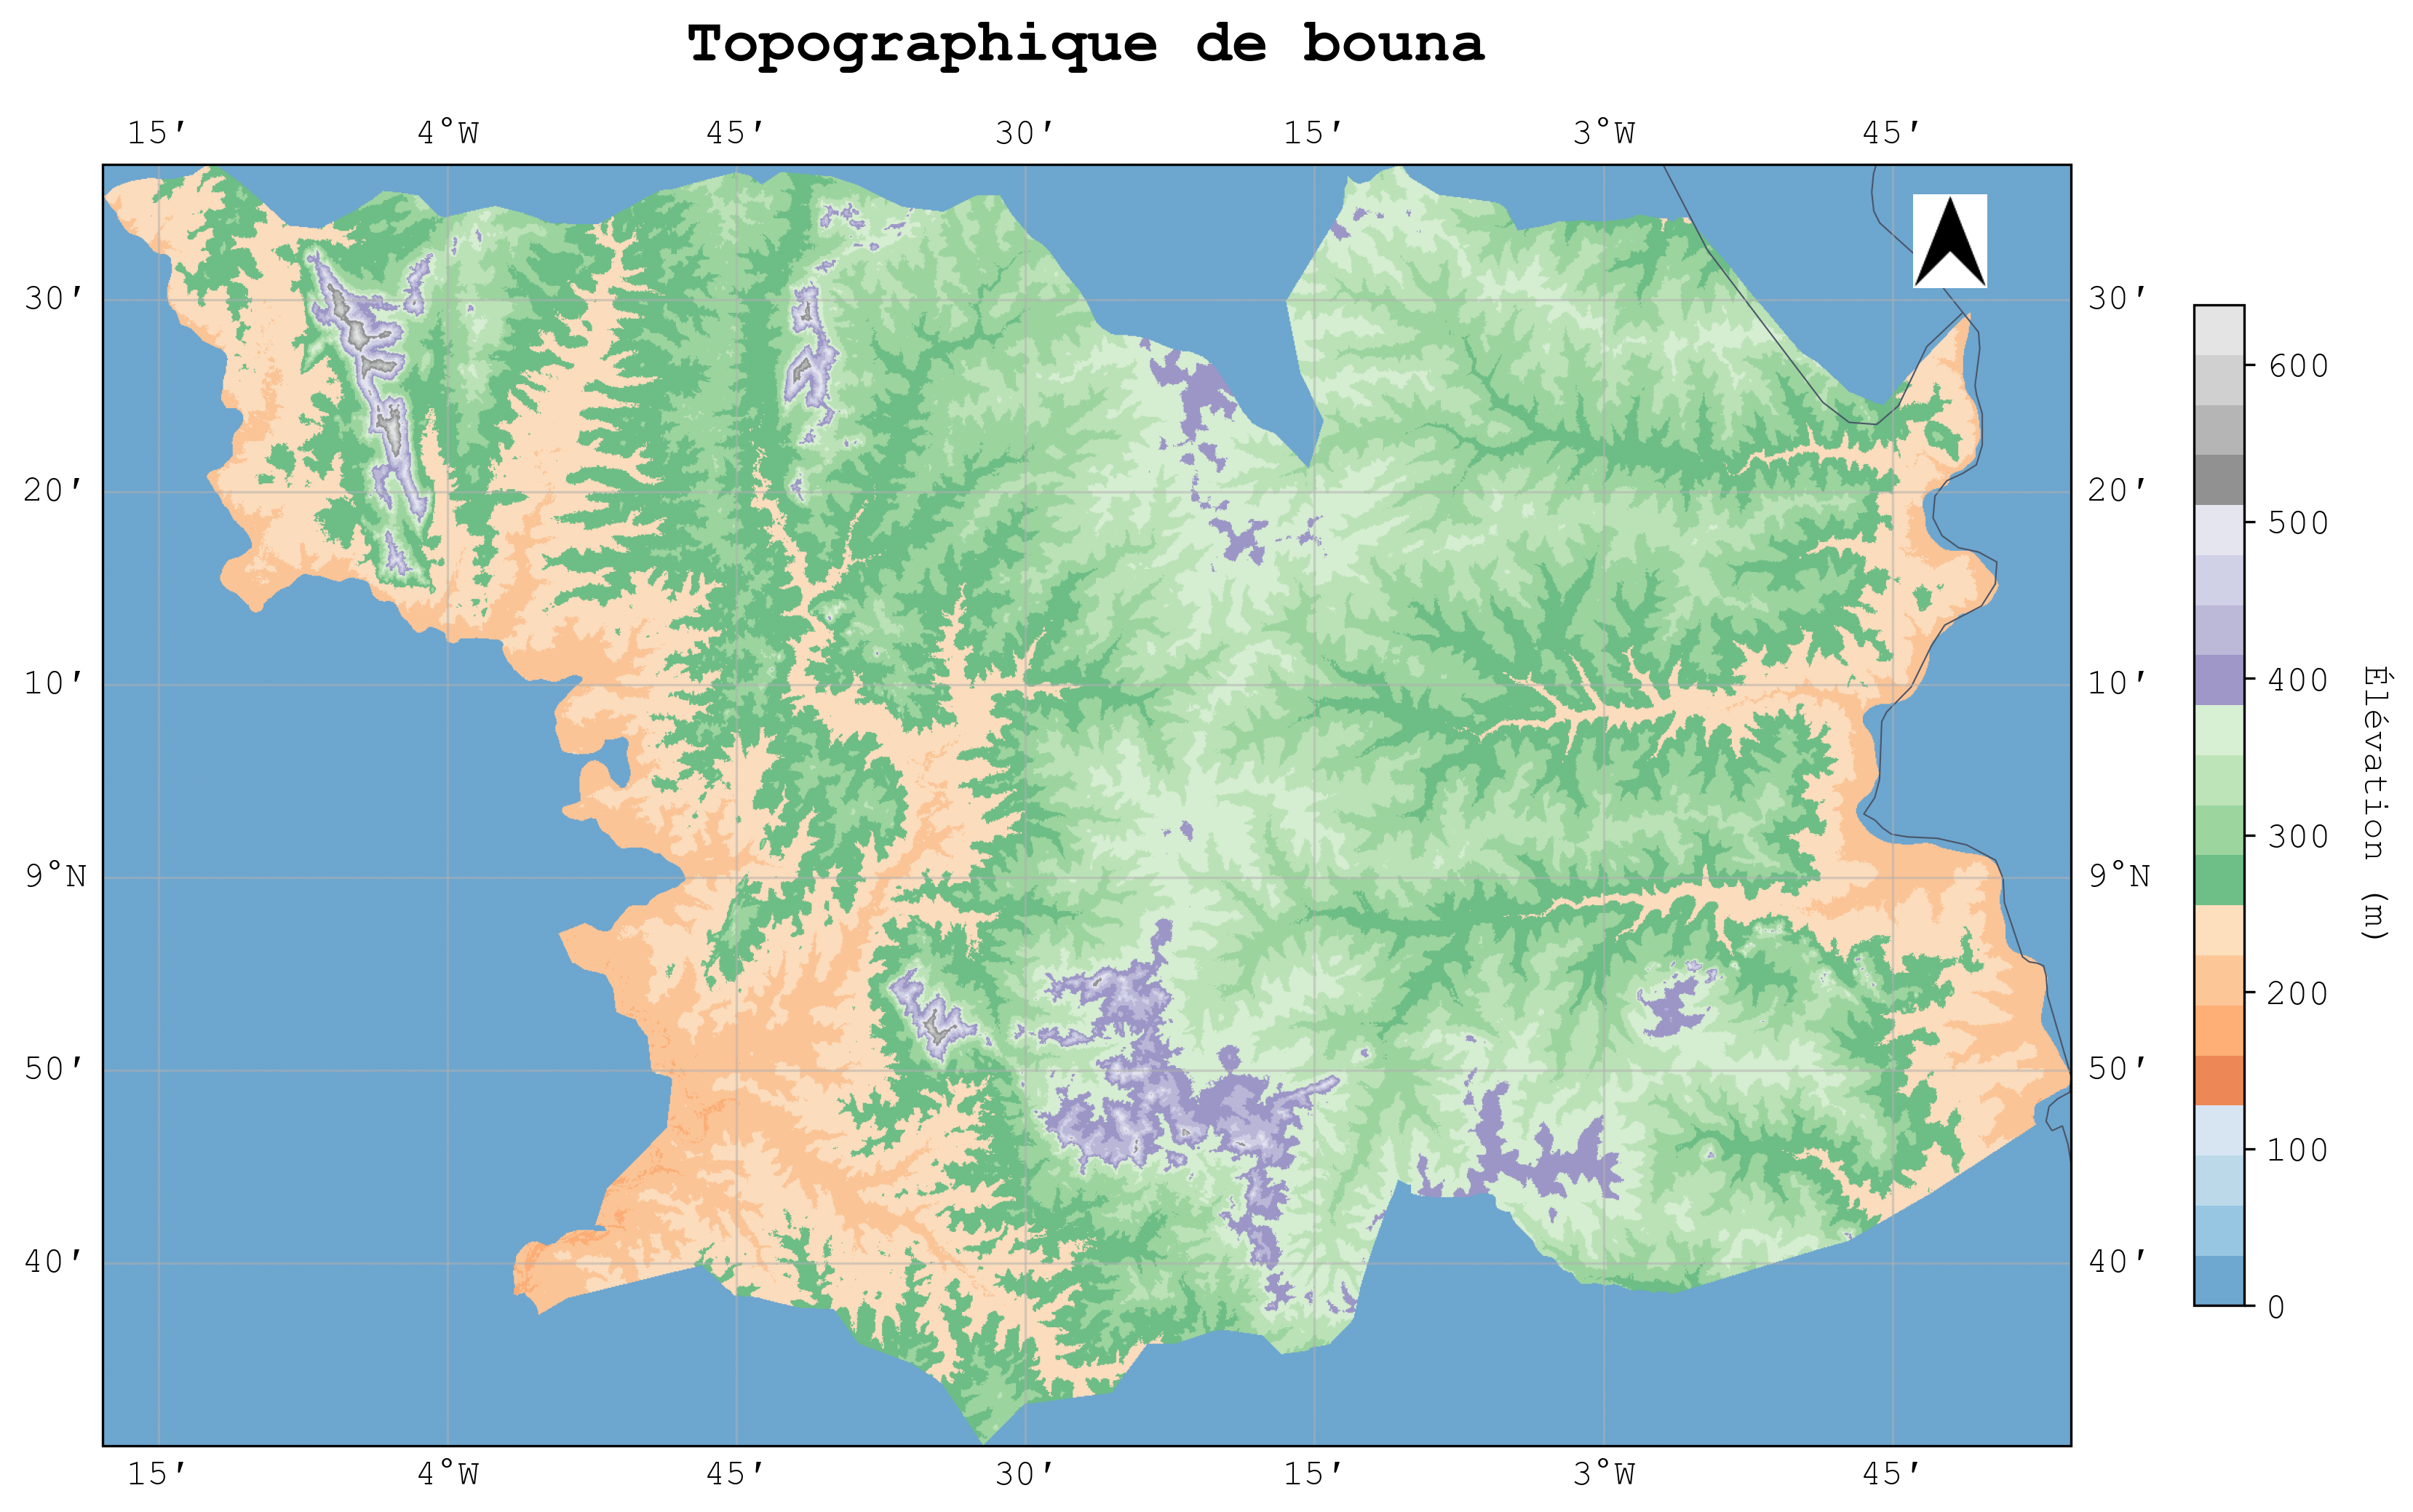

In [69]:
# Création d'une carte raster
carte = Map(figsize=(12, 8), projection=ccrs.PlateCarree())

# Ajout d'une couche raster
carte.add_raster('test\data\Limite DEM Bouna.tif', cmap='tab20c', title='Élévation (m)')

font_name=get_fonts("couri")[0]
font_name

carte.set_font(font_name, size=12)
carte.set_title('Topographique de bouna', fontsize=20, color='Black', pad=20)
carte.add_arrow('cartograpy/svg/arrows/NorthArrow_11.svg', position=(-2.70, 9.55), zoom=0.4, color='black')


# Sauvegarde
carte.save('carte_demo.png')

In [62]:
carte.get_available_palettes()

{'custom': [],
 'seaborn_qualitative': ['deep',
  'muted',
  'bright',
  'pastel',
  'dark',
  'colorblind',
  'Set1',
  'Set2',
  'Set3',
  'Paired',
  'tab10',
  'tab20'],
 'seaborn_sequential': ['Blues',
  'BuGn',
  'BuPu',
  'GnBu',
  'Greens',
  'Greys',
  'Oranges',
  'OrRd',
  'PuBu',
  'PuBuGn',
  'PuRd',
  'Purples',
  'RdPu',
  'Reds',
  'YlGn',
  'YlGnBu',
  'YlOrBr',
  'YlOrRd',
  'rocket',
  'mako',
  'flare',
  'crest'],
 'seaborn_diverging': ['BrBG',
  'PiYG',
  'PRGn',
  'PuOr',
  'RdBu',
  'RdGy',
  'RdYlBu',
  'RdYlGn',
  'Spectral',
  'coolwarm',
  'bwr',
  'seismic',
  'icefire',
  'vlag'],
 'matplotlib_sequential': ['viridis',
  'plasma',
  'inferno',
  'magma',
  'cividis',
  'Greys',
  'Purples',
  'Blues',
  'Greens',
  'Oranges',
  'Reds',
  'YlOrBr',
  'YlOrRd',
  'OrRd',
  'PuRd',
  'RdPu',
  'BuPu',
  'GnBu',
  'PuBu',
  'YlGnBu',
  'PuBuGn',
  'BuGn',
  'YlGn'],
 'matplotlib_diverging': ['PiYG',
  'PRGn',
  'BrBG',
  'PuOr',
  'RdGy',
  'RdBu',
  'RdYlBu',


['Point']


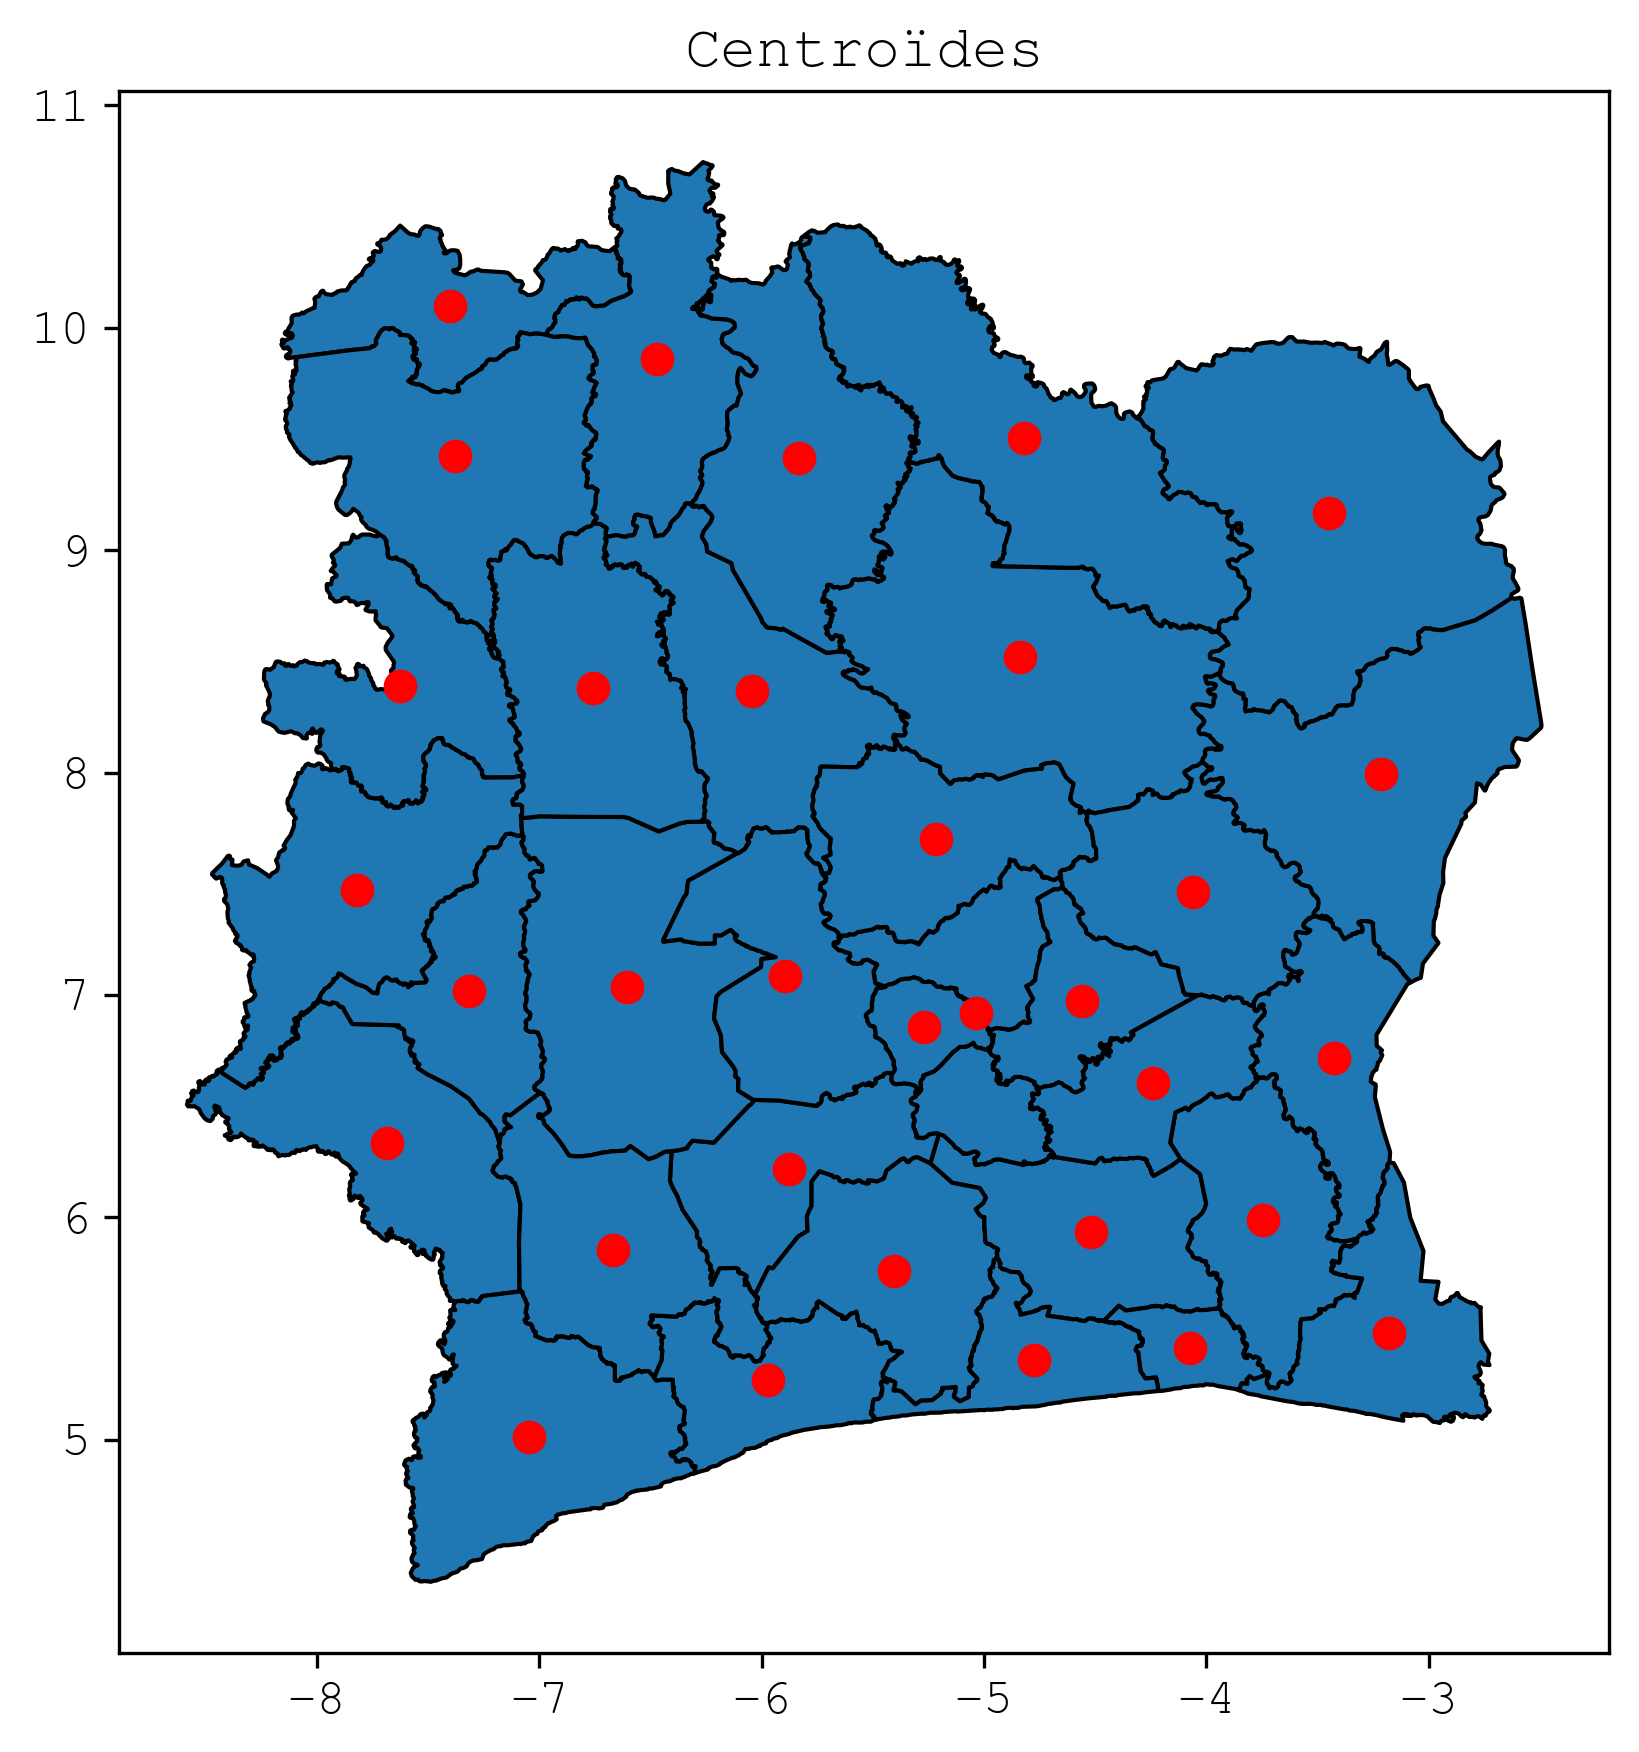

In [ ]:
from cartograpy.processing  import *
# Exemple d'utilisation
# Supposons que nous avons un GeoDataFrame de polygones appelé 'regions_gdf'
regions_centroids = centroids(civ_data)

# Maintenant regions_centroids est un GeoDataFrame de points (centroïdes)
# avec tous les attributs originaux de regions_gdf

# Vous pouvez vérifier le type de géométrie
print(regions_centroids.geometry.geom_type.unique())  # Devrait afficher ['Point']

# Visualisation
import matplotlib.pyplot as plt
fig, ax = plt.subplots( figsize=(14, 6), dpi=300)

civ_data.plot(ax=ax, edgecolor='black')
# ax.set_title('Polygones originaux')

regions_centroids.plot(ax=ax, markersize=50, color='red')
ax.set_title('Centroïdes')

plt.tight_layout()
plt.show()

In [64]:
regions_centroids.head()

geometry      shapeName shapeISO                  shapeID  \
0  POINT (-4.51788 5.93541)  Agneby-Tiassa           98640826B52449815511854   
1  POINT (-7.62443 8.38908)         Bafing           98640826B37750272367318   
2  POINT (-6.47105 9.86114)         Bagoue           98640826B26044148659027   
3  POINT (-5.03438 6.91729)         Belier            98640826B5123145245776   
4  POINT (-6.04067 8.36548)           Bere           98640826B43857880322183   

  shapeGroup shapeType  data  
0        CIV      ADM2  3060  
1        CIV      ADM2  2662  
2        CIV      ADM2  2805  
3        CIV      ADM2  9731  
4        CIV      ADM2  2187

In [65]:
from cartograpy.maper import *

In [66]:
import os
from io import BytesIO
from PIL import Image
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM




In [67]:
import countryflag

# Convert country names to flags
countries = ['Germany', 'BE', 'United States of America', 'Japan']
flags = countryflag.getflag(countries)
print(flags)  # 🇩🇪 🇧🇪 🇺🇸 🇯🇵

# Using the core class
from countryflag.core import CountryFlag

cf = CountryFlag()
flags, pairs = cf.get_flag(["United States", "Canada", "Mexico"])
print(flags)  # 🇺🇸 🇨🇦 🇲🇽

c:\Users\kanic\.virtualenvs\carto\Lib\site-packages\countryflag\core\flag.py:23: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # type: ignore


🇩🇪 🇧🇪 🇺🇸 🇯🇵
🇺🇸 🇨🇦 🇲🇽
